# Point Attractors - Hopfield Networks

In [174]:
import numpy as np
import matplotlib.pyplot as plt

In [175]:
def plot_patterns(patterns):
    grid_size = int(np.ceil(np.sqrt(len(patterns))))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 2, grid_size * 2))
    axes = axes.flatten()
    
    for i, pattern in enumerate(patterns):
        axes[i].imshow(pattern.reshape(7, 7), vmin=-1, vmax=1)

    for i in range(len(axes)): axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [176]:
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))
    
    def train(self, patterns):
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, -1)
        self.weights /= len(patterns)
    
    def recall(self, pattern, steps=5):
        for _ in range(steps):
            # The sign function returns -1 if x < -1, -1 if x==-1, 1 if x > -1
            pattern = np.sign(self.weights @ pattern)
        return pattern

## Train network

In [177]:
size = 49
patterns = [np.random.choice([-1, 1], size=size) for _ in range(6)]
hn = HopfieldNetwork(size)
hn.train(patterns)

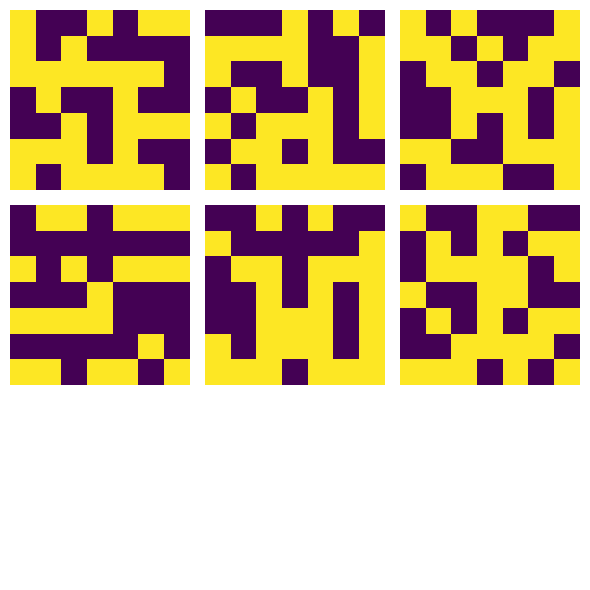

In [178]:
plot_patterns(patterns)

## Test network on corrupt pattern

In [179]:
corrupt_pattern = patterns[0].copy()
flip_indicies = np.random.choice(len(corrupt_pattern), size=5, replace=False)

corrupt_pattern[flip_indicies] *= -1
    
recovered_pattern = hn.recall(corrupt_pattern)

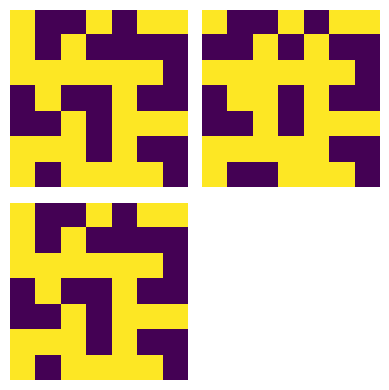

In [180]:
plot_patterns([patterns[0], corrupt_pattern, recovered_pattern])